In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
mouse_data_to_load = "Resources/Mouse_metadata.csv"
Studies_data_to_load = "Resources/Study_results.csv"


In [9]:
mouse_data_df = pd.read_csv(mouse_data_to_load)
studies_data_df = pd.read_csv(Studies_data_to_load)

In [10]:
combined_data_df = pd.merge(mouse_data_df, studies_data_df, how='right', on='Mouse ID')

In [11]:
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
#how many mice

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

In [ ]:
# Optional: Get all the data for the duplicate mouse ID

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

In [ ]:
#Checking the number of mice in the clean DataFrame

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_df = combined_data_df.groupby(['Drug Regimen'])

#mean
regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()

#median
regimen_median = regimen_df['Tumor Volume (mm3)'].median()

#variance
regimen_variance = regimen_df['Tumor Volume (mm3)'].var()

#standard deviation
regimen_standard_deviation = regimen_df['Tumor Volume (mm3)'].std()

regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

In [20]:
summary_stats = pd.DataFrame({'Mean':regimen_mean, 'Median':regimen_median, 'Variance':regimen_variance, 'Standard Deviation':regimen_standard_deviation, 'SEM':regimen_sem})

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


In [22]:
#defining gender df
gender_df = combined_data_df.groupby(['Mouse ID', 'Sex'])
gender_df

In [24]:
#Finding count and percentages of each sex for pieplot
mouse_gender_df = pd.DataFrame(gender_df.size())

#total count
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(['Sex']).count())
mouse_gender.columns = ['Total Count']

#percentage of female and male
mouse_gender['Percentage of Sex'] = (100*(mouse_gender['Total Count']/mouse_gender['Total Count'].sum()))

#percentage of gender
mouse_gender['Percentage of Sex'] = mouse_gender['Percentage of Sex']

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(5,5), colors, startangle=140, explode = explode, shadow = True, autopct = "%1.1f%%")

SyntaxError: positional argument follows keyword argument (<ipython-input-41-c28f4749f6d0>, line 4)

ValueError: 'label' must be of length 'x'

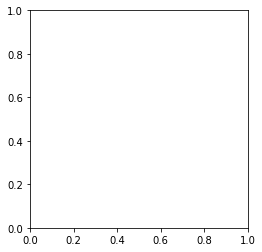

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =['Female, Male']
sizes = [49.799197,50.200803]
colors = ['blue', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
most_common = combined_data_df[combined_data_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
most_common = most_common.sort_values(['Timepoint'], ascending=True)
most_common

most_common_df = most_common[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

most_common_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

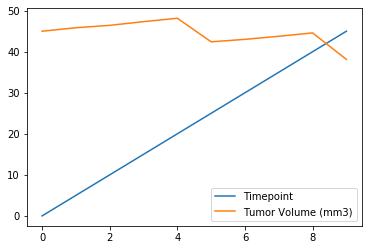

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point_vs_tumor = combined_data_df[combined_data_df['Mouse ID'].isin(['j119'])]
time_point_vs_tumor

time_point_vs_tumor_data = time_point_vs_tumor[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
time_point_vs_tumor_data

line_plot = time_point_vs_tumor_data.reset_index()
line_plot

line_plot_df = line_plot[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
line_plot_df

lines = line_plot_df.plot.line()

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_data_df[combined_data_df['Drug Regimen'].isin(['Capomulin'])]

capomulin_df_weight = most_common[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

capomulin_sorting = capomulin_df_weight.sort_values(['Weight (g)'], ascending=True)

capomulin_plot = capomulin_df.reset_index()

capomulin_mouse_weight = capomulin_plot.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

capomulin_mouse_weight_plot = pd.DataFrame(capomulin_mouse_weight).reset_index()

capomulin_df_scatter = capomulin_mouse_weight_plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize= (8,8))

TypeError: 'DataFrame' object is not callable

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
  